# Project: Investigate Data Set - No Show Appointment


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **1.0**: I have selected the No-show appointments (original source on
Kaggle) dataset. This dataset collects information from 100k medical appointments in
Brazil and is focused on the question of whether or not patients show up for their appointment. 
A number of characteristics about the patient are included in each row.
● ‘ScheduledDay’ tells us on what day the patient set up their appointment.
● ‘Neighborhood’ indicates the location of the hospital.
● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare
program Bolsa Família.
● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their
appointment, and ‘Yes’ if they did not show up.


Name (Value(s))          Description
PatienID (number)	    Identification of a patient
AppointmentID (number)   Identification of each appointment
Gender (F or M)	        It says 'F' if female or 'M' if man
ScheduledDay (date)	    Tells us on what day the patient set up their appointment
AppointmentDay (date)	The day of the actuall appointment, when they have to visit the doctor
Age	(number)	            How old is the patient
Neighbourhood (string)	Indicates the location of the hospital
Scholarship (0 or 1)	    Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família
Hipertension (0 or 1)	Indicates if the patient has hipertension
Diabetes (0 or 1)	    Indicates if the patient has diabetes
Alcoholism (0 or 1)	    Indicates if the patient is an alcoholic
Handcap (0 or 1)	        Indicates if the patient is handicaped
SMS_receive (0 or 1)	    1 or more messages sent to the patient
No-show	(Yes or No)	    It says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up


## Metadata
110527 rows/records (Medical Appointments) and 14 columns/variables associated with each records.

PatientId: Identification of a patient.

AppointmentID: Identification of each appointment.

Gender: Male (M) or Female (F).

ScheduledDay: The day someone called or registered the appointment, this is before appointment of course.

AppointmentDay: The day of the actuall appointment, when they have to visit the doctor.

Age: How old is the patient.

Neighbourhood: Where the appointment takes place.

Scholarship: True (1) of False (0).

Hypertension: True (1) or False (0).

Diabetes: True (1) or False (0).

Alcoholism: True (1) or False (0).

Handicap: The handcap refers to the number of disabilites a person has. 
For example, if the person is blind and can't walk the total is 2.

SMS_received: 1 or more messages sent to the patient.

No-show: Yes (If the patient did not show up for the appointment. No, if the patient shows up for the apponitment)




The most important variable in this research is "No-show".
This variable describes if the patient shows up or not for appointment.

# Dependent Variable: No-show

# Independent Variables: age, gender, scholarship, and waiting_period.

# Research Questions
1. What factors are important for us to know in order to predict if a patient will 
show up for their scheduled appointment?
2. Is there any correlation between age and those who shows up for appointments?
3. Is there any correlation between gender showing up for appointments?
4. Does receiving scholarship have a significant impact on showing up for appointments?
5. Does receiving messages have a significant impact on showing up for appointments?

In [1]:
#import the liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('C:/Users/USER/Desktop/Udacity Nanodegree projects/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [6]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There is no missing data in this dataset as shown above.

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Observing the age variable closely, I discovered there is an issue with the variable, -1 can not be someone's age. 
It is most likely a human error while entrying the data.
This will be fixed later. The average age in this dataset is 37, and the heighest age is 115.

In [8]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [9]:
type(df['No-show'][0])

str

In [10]:
type(df['ScheduledDay'][0])

str

In [11]:
type(df['AppointmentDay'][0])

str

ScheduledDay and AppointmentDay  shouldn't be a string. Hence, this will be converted to datetype

In [18]:
#Converting to datetype
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [13]:
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [14]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [15]:
# Non-null unique values for each feature
df.nunique()

PatientId          61744
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Insight from the code and output above

There are 61,744 Patient Ids. 
This means that some patients had more than one appointments. This information could lead to a useful analysis.
There are 110527 Appointment Ids and 103549 Scheduled Days.      
There are only 27 unique appointment days and 81 unique neighbourhoods.

In [16]:
# There is no missing value as shown below
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [17]:
# There is no duplicate in our dataset as shown below
df.duplicated().sum()

0

# Data Cleaning

### Data Cleaning (Extraneous Variables were dropped, variables renamed, incorrect data dropped, the dependent variable encoded)

Dropping Extraneous Variables

In [20]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [21]:
df.shape

(110527, 12)

In [22]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Rename the scheduledday, appointmentday, handcap, sms_received and No-show to No_show variables

In [23]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

df.rename(columns= {'scheduledday':'scheduled_day'}, inplace = True)

df.rename(columns= {'appointmentday':'appointment_day'}, inplace = True)

df.rename(columns = {'hipertension':'hypertension'}, inplace = True)

df.rename(columns= {'handcap':'handicap'}, inplace = True)

df.rename(columns= {'no-show':'no_show'}, inplace = True)

In [24]:
df.head(2)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [25]:
df.columns

Index(['gender', 'scheduled_day', 'appointment_day', 'age', 'neighbourhood',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap',
       'sms_received', 'no_show'],
      dtype='object')

Dropping incorrect data

Query negative values in age column. This is most likely human error.

In [26]:
negative_age = df.query('age < 0')
negative_age

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


Drop the row found with a negative age and check again to confirm it is dropped

In [27]:
df.drop(negative_age.index, inplace=True)
df.query('age < 0')

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


In [28]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


It is confirmed that the row is dropped

In [29]:
df.columns

Index(['gender', 'scheduled_day', 'appointment_day', 'age', 'neighbourhood',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap',
       'sms_received', 'no_show'],
      dtype='object')

Encoding dependent variable (no_show)

# Encoding no_show

In [30]:
"""
Checking counts of no_show variable
"Yes" implies no show. "No" implies show up for appointment.
Hence, 88207 showed up for appointment, while 22319 did not.

Convert "Yes" (No show for appointment) to 1, "No" (Show up for appointment) to 0
"""

df.no_show = np.where(df.no_show == "Yes", 1, 0)
df.no_show.value_counts()

0    88207
1    22319
Name: no_show, dtype: int64

In [31]:
df.head(2)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0


# General Data Exploaration with Visuals

Text(0, 0.5, 'Number of Patients')

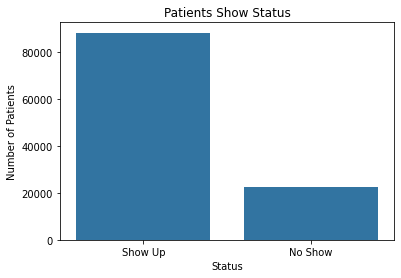

In [32]:
# plot a bar chart
base_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'no_show', color = base_color)
plt.title('Patients Show Status')
plt.xticks([0, 1], ['Show Up', 'No Show'])
plt.xlabel('Status')
plt.ylabel('Number of Patients')

From the above graph, it can be seen that over 80, 000 patients (88207) showed up for appointment, 
while over 20,000 patients (22319) did not.

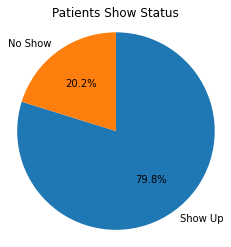

In [33]:
"""
Plot a pie chart to show the percentage of those who 
showed up  for appointments and those who did not.
"""
sorted_counts = df.no_show.value_counts()
plt.pie(sorted_counts, labels = ['Show Up', 'No Show'], startangle = 90,
        counterclock = False, autopct='%1.1f%%');
plt.axis('square')
plt.title('Patients Show Status');

From the above graph, it can be seen that the 88,207 patients who showed up for appointment constituted 79.8% of the whole population, while the 22319 patients who did not showed up for appointment constituted 20.2% of the whole population.

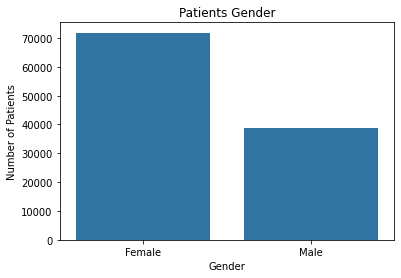

In [34]:
# Plot a bar chart
sns.countplot(data = df, x = 'gender', color = base_color)
plt.title('Patients Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Number of Patients');

In [35]:
df.gender.value_counts()

F    71839
M    38687
Name: gender, dtype: int64

From the above analysis, it can be seen that the 71839 patients who showed up for appointment are female, while the 22319 patients 38687 are male.

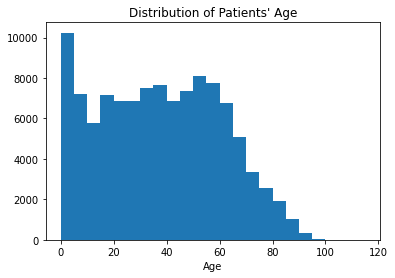

In [38]:
# plot a histogram 
bin_edges = np.arange(0, df['age'].max()+5, 5)
plt.hist(data = df, x = 'age', bins = bin_edges)
plt.xlabel('Age')
plt.title("Distribution of Patients' Age");

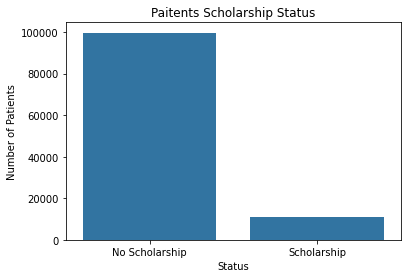

In [39]:
# plot a bar chart
sns.countplot(data = df, x = 'scholarship', color = base_color)
plt.title('Paitents Scholarship Status')
plt.xticks([0, 1], ['No Scholarship', 'Scholarship'])
plt.xlabel('Status')
plt.ylabel('Number of Patients');

In [40]:
df.scholarship.value_counts()

0    99665
1    10861
Name: scholarship, dtype: int64

From the above graph, it can be seen that almost 100, 000 patients (99665) had no scholarship, 
while over 10,000 patients (10861) had.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)